In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

# 한글
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family = font_name)
elif platform.system() == "Darwin":
    rc('font', family = 'AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [44]:
university = pd.read_csv('./data/descriptive.csv')
university

,resident,gender,age,level,cost,type,survey,pass
0,1.0,1,50,1.0,5.1,1.0,1.0,2.0
1,2.0,1,54,2.0,4.2,1.0,2.0,2.0
2,NaN,1,62,2.0,4.7,1.0,1.0,1.0
3,4.0,2,50,NaN,3.5,1.0,4.0,1.0
4,5.0,1,51,1.0,5.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...
295,1.0,5,48,2.0,7.1,1.0,NaN,2.0
296,3.0,1,55,3.0,6.1,1.0,NaN,2.0
297,4.0,1,51,1.0,5.5,1.0,NaN,NaN
298,3.0,0,50,1.0,5.1,1.0,3.0,1.0


1    173
2    124
0      2
5      1
Name: gender, dtype: int64
1    173
2    124
Name: gender, dtype: int64


<Axes: >

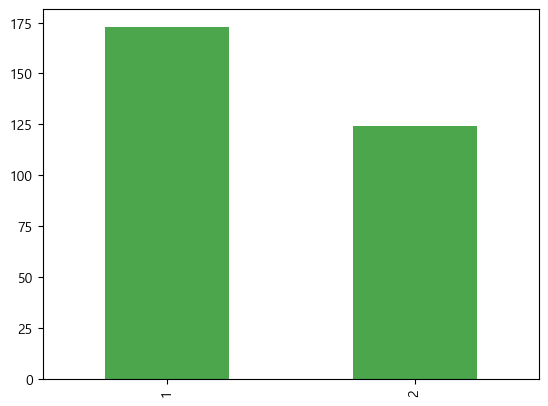

In [45]:
# gender 는 성별을 구분하기 위한 변수
# 명목 척도 이므로 요약 통계량은 의미가 없고 구성 비율만 의미를 가짐
# print(university.gender.describe()) # 의미 없음

print(university.gender.value_counts()) # 인원수
# 0, 5 라는 이상치 존재
# 이상치가 존재하면 카테고리 형 데이터에서는 제거하는 경우가 많음
# 양을 나타내는 경우는 정규화나 표주화를 이용해서 숫자의 범위를 조정하는 경우도 있음

# 1과 2만 추출
university_gender = university[(university.gender == 1) | (university.gender == 2)]
print(university_gender.gender.value_counts())
# 성별 비율을 시각화 - 막대나 파이 차트를 이용해서 시각화
university_gender['gender'].value_counts().plot.bar(color= 'g', alpha = 0.7)

In [46]:
university_gender

,resident,gender,age,level,cost,type,survey,pass
0,1.0,1,50,1.0,5.1,1.0,1.0,2.0
1,2.0,1,54,2.0,4.2,1.0,2.0,2.0
2,NaN,1,62,2.0,4.7,1.0,1.0,1.0
3,4.0,2,50,NaN,3.5,1.0,4.0,1.0
4,5.0,1,51,1.0,5.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...
293,1.0,2,62,2.0,4.5,1.0,3.0,1.0
294,2.0,1,65,1.0,3.5,1.0,NaN,2.0
296,3.0,1,55,3.0,6.1,1.0,NaN,2.0
297,4.0,1,51,1.0,5.5,1.0,NaN,NaN


1.0    115
2.0     99
3.0     70
Name: level, dtype: int64


<Axes: >

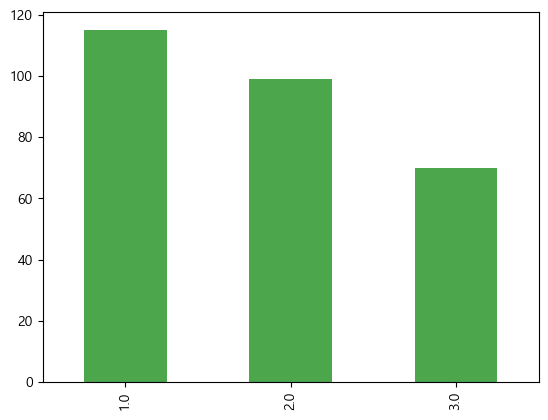

In [47]:
print(university_gender.level.value_counts())
# 성별 비율을 시각화 - 막대나 파이 차트를 이용해서 시각화
university_gender['level'].value_counts().plot.bar(color= 'g', alpha = 0.7)

count    185.000000
mean       2.589189
std        0.980180
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: survey, dtype: float64


<Axes: ylabel='survey'>

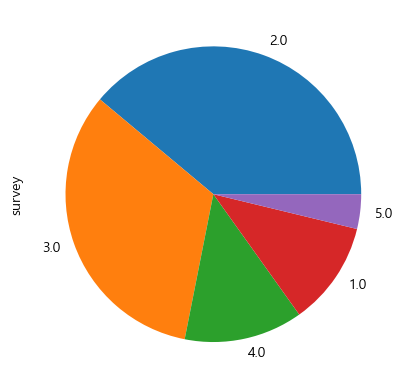

In [48]:
# survey 는 등간 척도라서 요약 통계량과 구성 비율도 의미를 갖음
print(university_gender.survey.describe())
university_gender.survey.value_counts().plot.pie()

In [49]:
print(university_gender.cost.describe())
# 값의 종류가 너무 많음
# 비율 척도가 직접 입력하는 형태가 되므로 이상치나 결측치의 발생 가능성이 높음
# UI 를 만들 때 다른 척도에 비해서 주의를 기울여야 함
university_gender.cost.value_counts()

count    268.000000
mean       8.754478
std       69.356480
min     -457.200000
25%        4.400000
50%        5.400000
75%        6.300000
max      675.000000
Name: cost, dtype: float64


 5.0      18
 6.3      16
 4.0      15
 6.0      14
 6.2      13
 6.4      11
 5.1      10
 5.2       9
 4.1       9
 6.1       8
 6.7       8
 5.5       8
 5.3       7
 5.7       6
 4.7       6
 3.0       6
 5.8       5
 4.3       5
 5.4       5
 3.5       5
 4.6       5
 6.8       4
 5.6       4
 4.4       4
 6.9       4
 6.5       4
 7.7       4
 4.9       4
 3.9       3
 7.0       3
 4.2       3
 3.8       3
 7.1       3
-235.8     2
 336.5     2
 2.3       2
 7.2       2
 7.9       2
 75.1      2
 115.7     2
 5.9       2
 85.1      2
 3.4       2
-5.9       2
 4.8       2
 3.3       2
-4.8       1
-345.6     1
 675.0     1
 225.8     1
-457.2     1
 1.0       1
-75.0      1
 2.1       1
 257.8     1
 4.5       1
Name: cost, dtype: int64

In [50]:
# 일반적인 생활비는 2 ~ 10 으로 설정
cost = university_gender.cost
print(cost[(cost >= 2) & (cost <=10)].describe())
print(cost[(cost >= 2) & (cost <=10)].value_counts())

count    248.000000
mean       5.354032
std        1.138783
min        2.100000
25%        4.600000
50%        5.400000
75%        6.200000
max        7.900000
Name: cost, dtype: float64
5.0    18
6.3    16
4.0    15
6.0    14
6.2    13
6.4    11
5.1    10
4.1     9
5.2     9
5.5     8
6.1     8
6.7     8
5.3     7
3.0     6
5.7     6
4.7     6
4.6     5
4.3     5
5.8     5
5.4     5
3.5     5
5.6     4
6.9     4
4.9     4
6.5     4
4.4     4
6.8     4
7.7     4
3.8     3
3.9     3
7.0     3
4.2     3
7.1     3
3.4     2
3.3     2
7.2     2
5.9     2
4.8     2
2.3     2
7.9     2
2.1     1
4.5     1
Name: cost, dtype: int64


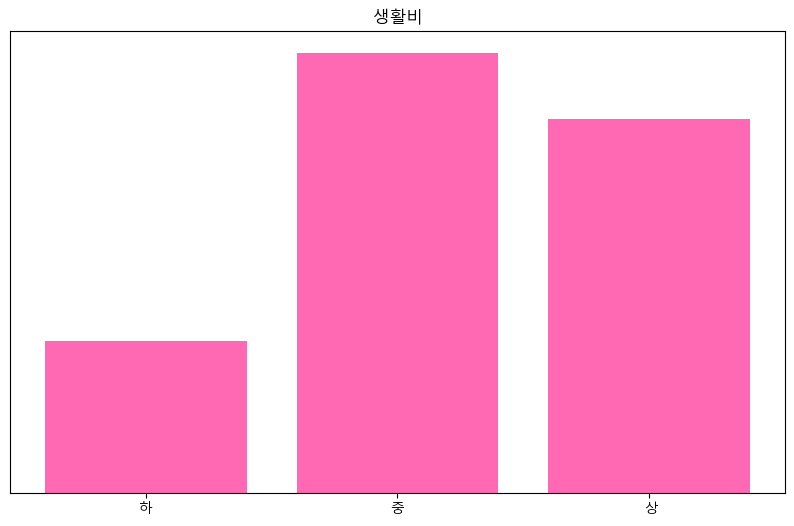

In [51]:
plt.figure(figsize = (10, 6))

ys, xs, patches = plt.hist(cost[(cost >=2) & (cost <=10)],
                           bins =3, # 구간의 개수
                           density = True, # 백분율 설정
                           cumulative = False, # 누적 여부
                           histtype= 'bar', # step 도 있음
                           orientation = 'vertical',
                           rwidth = 0.8,
                           color = 'hotpink')

plt.yticks([])
plt.xticks([(xs[i] + xs[i+1])/2 for i in range(0, len(xs)-1)], ['하', '중',' 상'])

plt.title('생활비')
plt.show()

In [52]:
cost = university_gender.cost
cost = cost[(cost >= 1) & (cost <= 10)]
cost[(cost >= 1) & (cost <=3)] = 1
cost[(cost > 3) & (cost <=6)] = 2
cost[(cost > 6) & (cost <=10)] = 3

cost = cost.astype(int)
cost

2    157
3     82
1     10
Name: cost, dtype: int64

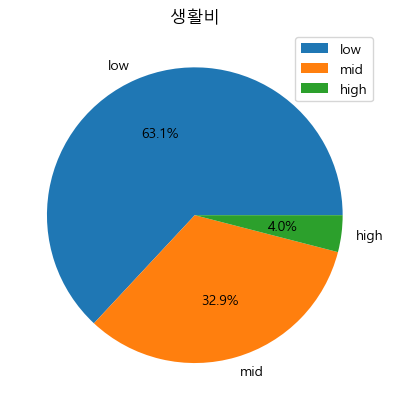

In [53]:
plt.pie(cost.value_counts(), labels = ['low','mid','high'], autopct = '%1.1f%%')
plt.title('생활비')
plt.legend()
plt.show()

In [56]:
import math
s = pd.Series([10,11, 10.78])
print('평균 성장률:', s.pct_change().mean()) # 산술 평균
print(10 * 1.040000000000000036 * 1.040000000000000036)
# 기하 평균
print('기하 평균', math.sqrt((11/10)*(10.78/11)))
print(10 * 1.0382677881933928 * 1.0382677881933928)

평균 성장률: 0.040000000000000036
10.816
기하 평균 1.0382677881933928
10.78


In [60]:
# 절사 평균을 구하기 위해 import
from scipy import stats

tdata = pd.read_csv('./data/tdata.csv', encoding = 'cp949')
# print(tdata)
print('mean:', tdata.성적.mean())
print('median:', tdata.성적.median())
print('절사평균:', stats.trim_mean(tdata.성적, 0.1))

mean: 77.1
median: 77.5
절사평균: 77.0


In [61]:
pip install wquantiles

Note: you may need to restart the kernel to use updated packages.


In [70]:
# 각 주의 이름과 약자 인구 살인사건 발생률 데이터
# population 인구 , murder rate 살인사건 발생률
# murder.Rate 의 평균을 바로 구하는 것은 인구에 대한 가중치를 
# 부여하지 않았기 때문에 결과가 왜곡될 수 있음
state = pd.read_csv('./data/state.csv')
print(state.head())

print('mean :', state['Murder.Rate'].mean())
print('median :', state['Murder.Rate'].median())

# 가중 중앙값과 가중 평균 구하기
import wquantiles
print('weigth_mean :', np.average(state['Murder.Rate'], weights= state['Population']))
print('weigth_median :', wquantiles.median(state['Murder.Rate'], weights= state['Population']))

        State  Population  Murder.Rate Abbreviation
0     Alabama     4779736          5.7           AL
1      Alaska      710231          5.6           AK
2     Arizona     6392017          4.7           AZ
3    Arkansas     2915918          5.6           AR
4  California    37253956          4.4           CA
mean : 4.066
median : 4.0
weigth_mean : 4.445833981123393
weigth_median : 4.4


0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


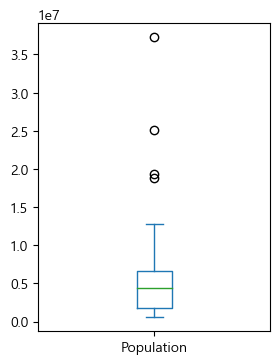

In [73]:
# 4분위 수와 백분위 수를 확인
state = pd.read_csv('./data/state.csv')
print(state['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95]))

# 녹색 선이 50% 양 끝 선이 25, 75%
# 수염의 끝은 하위 25 에서 (75%-25%) * 1.5을 뺀 값
# 가장 일반적인 이상치 검사 방법은 수염 외부에 있는 값을 이상치로 간주하는 것

ax = (state.Population.plot.box(figsize = (3,4)))
plt.show()

In [75]:
# population을 10개의 그룹으로 분할 한 후 개수 구하기
binnedPopulation = pd.cut(state['Population'], 10)
# 그룹 별로 데이터의 개수를 가지고 정렬해서 추력
print(binnedPopulation.value_counts())
# 각 구간에 속한 주 이름을 같이 출력

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64


In [ ]:
df = df.sort_values(by = 'Population')

groups = []

for group, subset in df.groupby(by = 'binnedPopulation'):
    groups.append({
        'BinRange' : group,
        'Counts' : len(subset),
        'States' : ','.join(subset.Abbreviation)
    })

print(pd.DataFrame(groups))

In [88]:
# 상대 도수와 누적 도수 출력
scores = pd.read_csv('./data/scores_em.csv', index_col = 'student number')
# print(scores)

# 영어 점수 꺼내기
english_scores = np.array(scores['english'])
# 0 ~ 100까지를 10개의 구간으로 나누어서 개수를 파악
freq, _ = np.histogram(english_scores, bins = 10, range= (0, 100))
# print(freq)

# 0 ~ 10, 10 ~ 20 형태의 문자열 만들기
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
# print(freq_class)

# 문자열과 데이터 개수를 가지고 DataFrame 만들기
freq_dist_df = pd.DataFrame({'빈도_수' : freq}, index = pd.Index(freq_class, name = '구간'))
# freq_dist_df 

# 상대 도수 만들기
rel_freq = freq / freq.sum()
# print(rel_freq)

# 누적 상대 도수 만들기
cum_rel_freq = np.cumsum(rel_freq)
# print(cum_rel_freq)

freq_dist_df['상대도수'] = rel_freq
freq_dist_df['누적상대도수'] = cum_rel_freq
print(freq_dist_df)

        빈도_수  상대도수  누적상대도수
구간                        
0~10       0  0.00    0.00
10~20      0  0.00    0.00
20~30      0  0.00    0.00
30~40      2  0.04    0.04
40~50      8  0.16    0.20
50~60     16  0.32    0.52
60~70     18  0.36    0.88
70~80      6  0.12    1.00
80~90      0  0.00    1.00
90~100     0  0.00    1.00


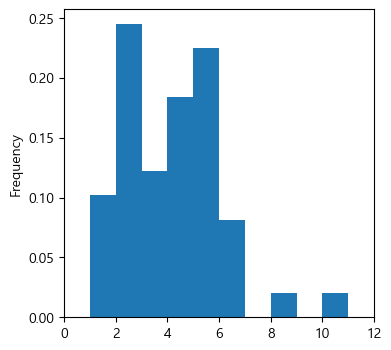

In [89]:
# 히스토그램
ax = state['Murder.Rate'].plot.hist(density = True, xlim = [0, 12],
                                    bins = range(1,12), figsize = (4,4))
plt.show()

In [94]:
# 교차 분석
university = pd.read_csv('./data/descriptive.csv')
# print(university)

# cost 열 제거
university.drop('cost', axis = 1, inplace= True)
# print(university)

# gender 대신에 남자 여자로 변경한 컬럼을 추가
university['성별'] = '남자'
idx = 0
for val in university['gender']:
    if val == 2:
        university['성별'][idx] = '여자'
    idx += 1

university.drop('gender', axis = 1, inplace= True)
# print(university)

university['학력'] = '응답없음'

idx = 0
for val in university['level']:
    if val == 1.0:
        university['학력'][idx] = '고졸'
    elif val == 2.0:
        university['학력'][idx] = '대졸'
    elif val == 3.0:
        university['학력'][idx] = '대학원졸'
    idx += 1

university.drop('level', axis = 1, inplace = True)
# print(university)

university['합격여부'] = '응답없음'
idx = 0
for val in university['pass']:
    if val == 1.0:
        university['합격여부'] = '합격'
    elif val == 2.0:
        university['합격여부'] = '불합격'

university.drop('pass', axis = 1, inplace = True)
print(university)

     resident  age  type  survey  성별    학력 합격여부
0         1.0   50   1.0     1.0  남자    고졸  불합격
1         2.0   54   1.0     2.0  남자    대졸  불합격
2         NaN   62   1.0     1.0  남자    대졸  불합격
3         4.0   50   1.0     4.0  여자  응답없음  불합격
4         5.0   51   1.0     3.0  남자    고졸  불합격
..        ...  ...   ...     ...  ..   ...  ...
295       1.0   48   1.0     NaN  남자    대졸  불합격
296       3.0   55   1.0     NaN  남자  대학원졸  불합격
297       4.0   51   1.0     NaN  남자    고졸  불합격
298       3.0   50   1.0     3.0  남자    고졸  불합격
299       1.0   49   1.0     NaN  남자  대학원졸  불합격

[300 rows x 7 columns]


C:\Users\USER\AppData\Local\Temp\ipykernel_3912\2167827039.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  university['성별'][idx] = '여자'
C:\Users\USER\AppData\Local\Temp\ipykernel_3912\2167827039.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  university['학력'][idx] = '고졸'
C:\Users\USER\AppData\Local\Temp\ipykernel_3912\2167827039.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  university['학력'][idx] = '대졸'
C:\Users\USER\Ap

In [98]:
# 응답없음 제거
university = university[(university['학력'] == '고졸') |( university['학력'] == '대졸') | (university['학력'] == '대학원졸')]

# 학력과 합격 여부에 대한 교차 분할표
print(pd.crosstab(university['학력'], university['성별']))

성별    남자  여자
학력          
고졸    67  50
대졸    60  40
대학원졸  42  28


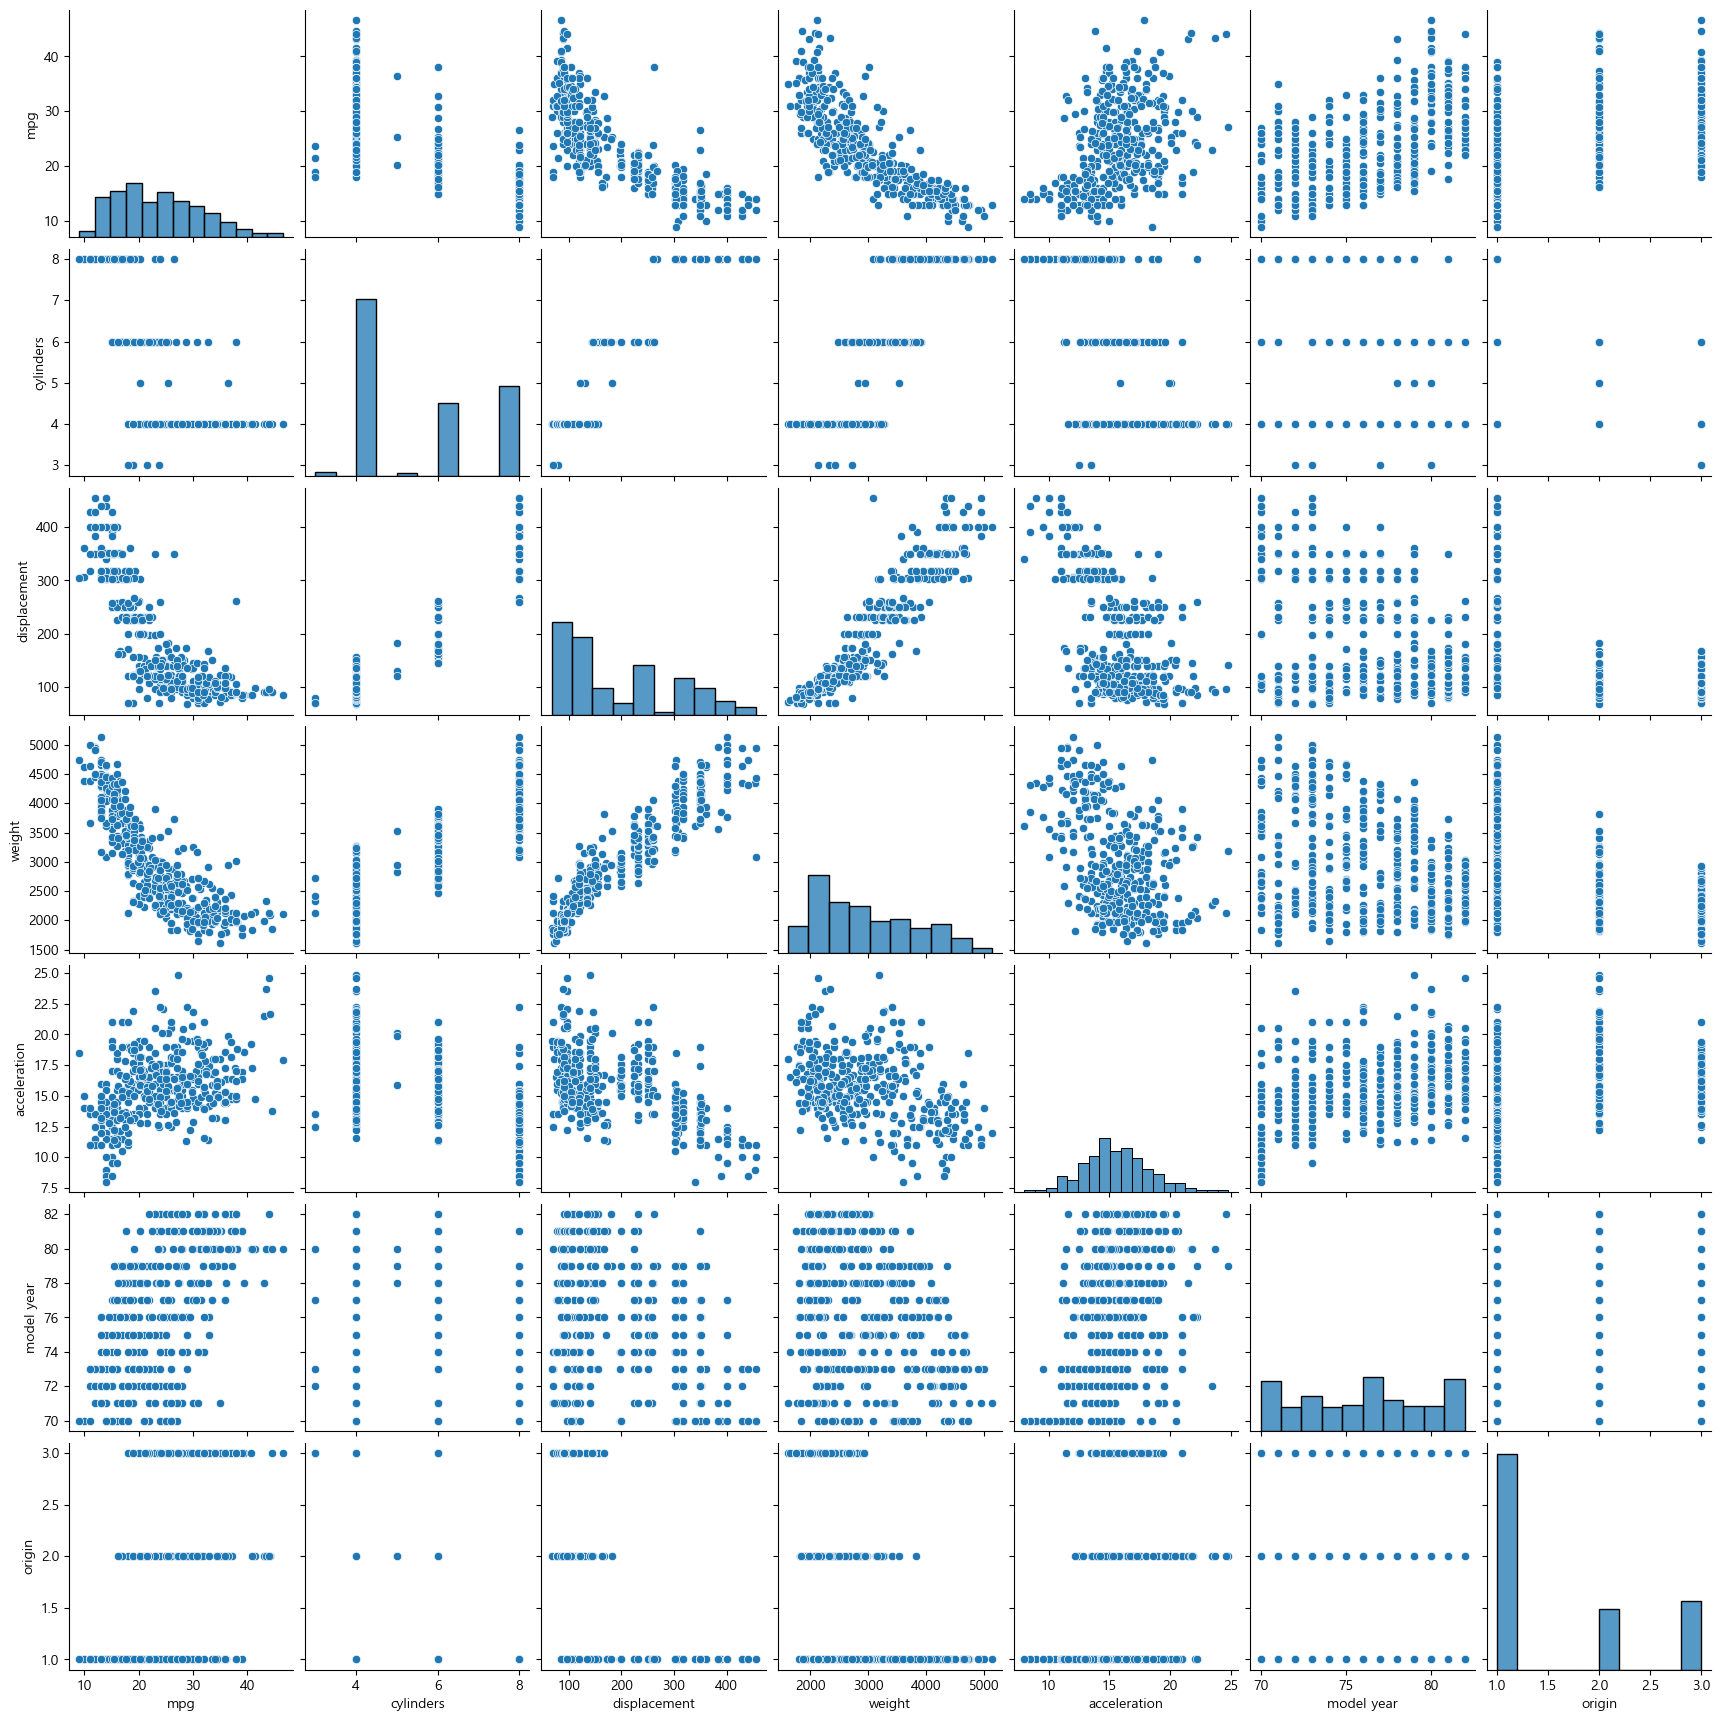

In [101]:
mpg = pd.read_csv('./data/auto-mpg.csv', header = None)
mpg.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model year', 'origin', 'name']
# print(mpg.head())
# 모든 컬럼에 대한 산점도 그리기
import seaborn as sns
sns.pairplot(mpg)

In [102]:
# 모든 숫자 컬럼의 상관 계수 확인
print(mpg.corr())

# 이 경우 mpg 에 대한 회귀 분석을 할 때는 차원 축소나 제거를 고려
# cylinders 와 displacepment 가 강한 상관 관계를 가지고 있음
# 상관 관계를 가지고 있는 feature 를 이용해서 분석을 하게 되면
# 다중공선성 문제가 발생

                   mpg  cylinders  displacement    weight  acceleration  \
mpg           1.000000  -0.775396     -0.804203 -0.831741      0.420289   
cylinders    -0.775396   1.000000      0.950721  0.896017     -0.505419   
displacement -0.804203   0.950721      1.000000  0.932824     -0.543684   
weight       -0.831741   0.896017      0.932824  1.000000     -0.417457   
acceleration  0.420289  -0.505419     -0.543684 -0.417457      1.000000   
model year    0.579267  -0.348746     -0.370164 -0.306564      0.288137   
origin        0.563450  -0.562543     -0.609409 -0.581024      0.205873   

              model year    origin  
mpg             0.579267  0.563450  
cylinders      -0.348746 -0.562543  
displacement   -0.370164 -0.609409  
weight         -0.306564 -0.581024  
acceleration    0.288137  0.205873  
model year      1.000000  0.180662  
origin          0.180662  1.000000  


C:\Users\USER\AppData\Local\Temp\ipykernel_3912\2260132174.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(mpg.corr())


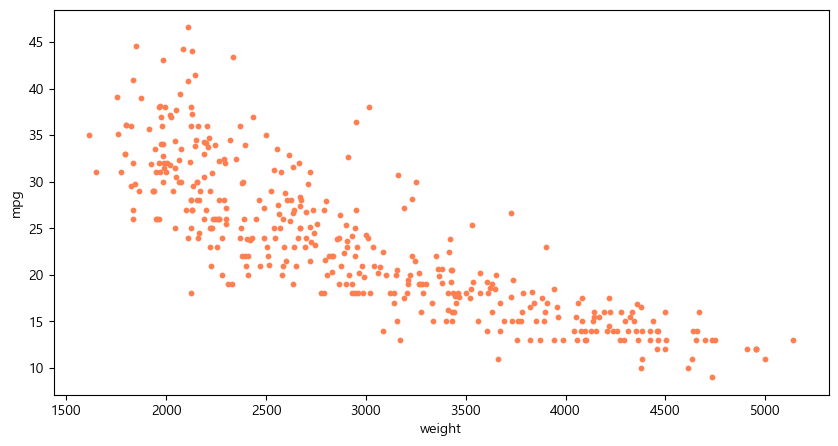

In [104]:
mpg.plot(kind = 'scatter', x = 'weight', y = 'mpg', c = 'coral', s= 10, figsize = (10, 5))
plt.show()

<Axes: xlabel='weight', ylabel='mpg'>

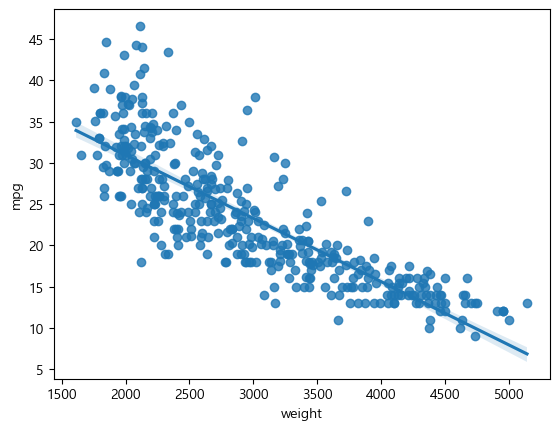

In [105]:
# 회귀선과 분포를 함께 확인
sns.regplot(x = 'weight', y = 'mpg', data = mpg)

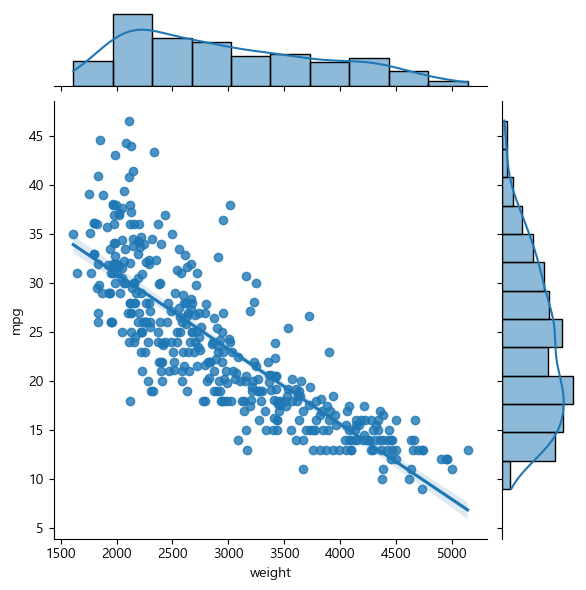

In [107]:
# 회귀선과 분포를 함께 확인
sns.jointplot(x = 'weight', y = 'mpg', kind= 'reg', data = mpg)

In [111]:
# print(mpg.corr())
# 모든 숫자 컬럼의 상관 계수를 구하는데 horsepower 는 나오지 않음
# 이런 경우 자료형 확인 - horsepower 가 object 타입

mpg['horsepower'].replace("?", np.nan, inplace=True)
mpg.dropna(subset =['horsepower'], axis = 0, inplace = True)
mpg.horsepower = mpg.horsepower.astype('float')

print(mpg.corr())

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
model year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration  model year    origin  
mpg               0.423329    0.580541  0.565209  
cylinders        -0.504683   -0.345647 -0.568932  
displacement     -0.543800   -0.369855 -0.614535  
horsepower       -0.689196   -0.416361 -0.455171  
weight           -0.416839   -0.309120 -0.585005  
acceleration      1.000000    0.2903

C:\Users\USER\AppData\Local\Temp\ipykernel_3912\2043705255.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(mpg.corr())


In [112]:
# 유의 확률이 낮으면 신뢰할 수 있는 값
import scipy as sp
result = sp.stats.pearsonr(mpg['mpg'].values, mpg['horsepower'].values)
result

# 유의확률이 0.01보다 작으므로 신뢰할 수 있음

PearsonRResult(statistic=-0.7784267838977761, pvalue=7.031989029404151e-81)

In [118]:
# 앤스콤 데이터 가져오기
import statsmodels.api as sm
data = sm.datasets.get_rdataset('anscombe')
df = data.data
# 데이터 확인
# df
print(df[['x1', 'y1']].corr())
print(df[['x2', 'y2']].corr())
print(df[['x3', 'y3']].corr())
print(df[['x4', 'y4']].corr())

result = sp.stats.pearsonr(df['x1'].values, df['y1'].values)
print(result)
result = sp.stats.pearsonr(df['x2'].values, df['y2'].values)
print(result)
result = sp.stats.pearsonr(df['x3'].values, df['y3'].values)
print(result)
result = sp.stats.pearsonr(df['x4'].values, df['y4'].values)
print(result)

          x1        y1
x1  1.000000  0.816421
y1  0.816421  1.000000
          x2        y2
x2  1.000000  0.816237
y2  0.816237  1.000000
          x3        y3
x3  1.000000  0.816287
y3  0.816287  1.000000
          x4        y4
x4  1.000000  0.816521
y4  0.816521  1.000000
PearsonRResult(statistic=0.8164205163448399, pvalue=0.0021696288730787927)
PearsonRResult(statistic=0.8162365060002427, pvalue=0.0021788162369108027)
PearsonRResult(statistic=0.8162867394895982, pvalue=0.002176305279228025)
PearsonRResult(statistic=0.8165214368885029, pvalue=0.002164602347197218)


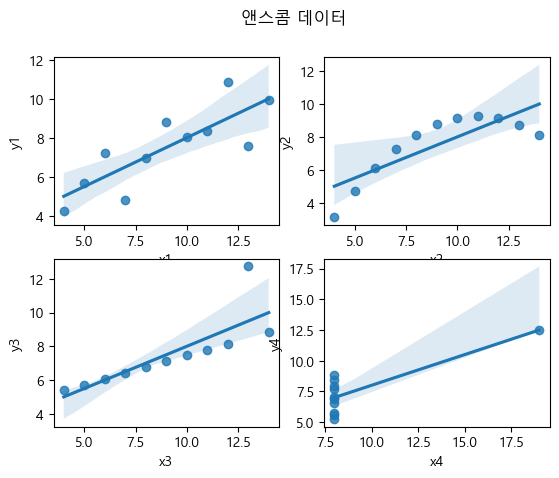

In [121]:
plt.subplot(221)
sns.regplot(x = 'x1', y = 'y1', data = df)
plt.subplot(222)
sns.regplot(x = 'x2', y = 'y2', data = df)
plt.subplot(223)
sns.regplot(x = 'x3', y = 'y3', data = df)
plt.subplot(224)
sns.regplot(x = 'x4', y = 'y4', data = df)
plt.suptitle('앤스콤 데이터')
plt.show()

In [122]:
s1 = pd.Series([1,2,3,4,5,6])
s2 = pd.Series([1,8,27,64,125,216])

p1 = pd.Series([1,2,3,4,5,6])
p2 = pd.Series([1,1,2,3,5,8])
print('pearson :', s1.corr(s2))
print('pearson :', p1.corr(p2))
print('pearson :', sp.stats.pearsonr(s1,s2))

pearson : 0.9379313244517968
pearson : 0.9389529557231421
pearson : PearsonRResult(statistic=0.9379313244517968, pvalue=0.005659220304470507)


In [125]:
s1 = pd.Series([1,2,3,4,5,6])
s2 = pd.Series([1,8,27,64,125,216])

p1 = pd.Series([1,2,3,4,5,6])
p2 = pd.Series([1,1,2,3,5,8])
print('spearman :', s1.corr(s2, method = 'spearman'))
print('spearman :', p1.corr(p2, method = 'spearman'))
print('spearman :', sp.stats.spearmanr(s1,s2))

spearman : 1.0
spearman : 0.9856107606091623
spearman : SignificanceResult(statistic=1.0, pvalue=0.0)


In [126]:
s1 = pd.Series([1,2,3,4,5,6])
s2 = pd.Series([1,8,27,64,125,216])

p1 = pd.Series([1,2,3,4,5,6])
p2 = pd.Series([1,1,2,3,5,8])
print('spearman :', s1.corr(s2, method = 'kendall'))
print('spearman :', p1.corr(p2, method = 'kendall'))
print('spearman :', sp.stats.kendalltau(s1,s2))

spearman : 0.9999999999999999
spearman : 0.9660917830792959
spearman : SignificanceResult(statistic=0.9999999999999999, pvalue=0.002777777777777778)


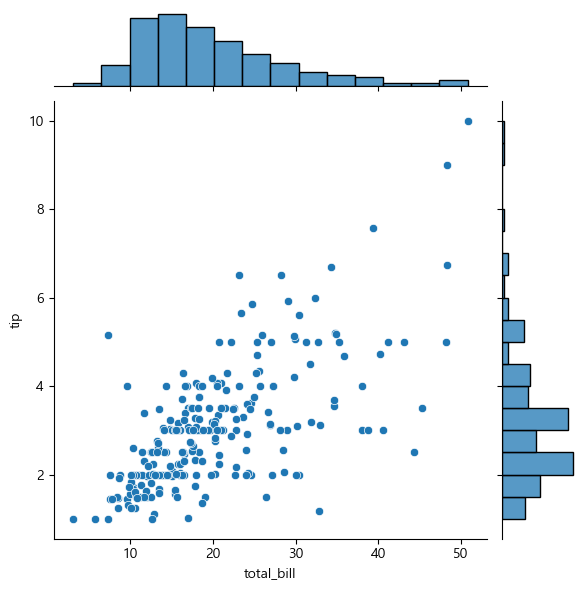

In [128]:
tips = sns.load_dataset('tips')
sns.jointplot(x = 'total_bill', y='tip', data= tips, kind = 'scatter')

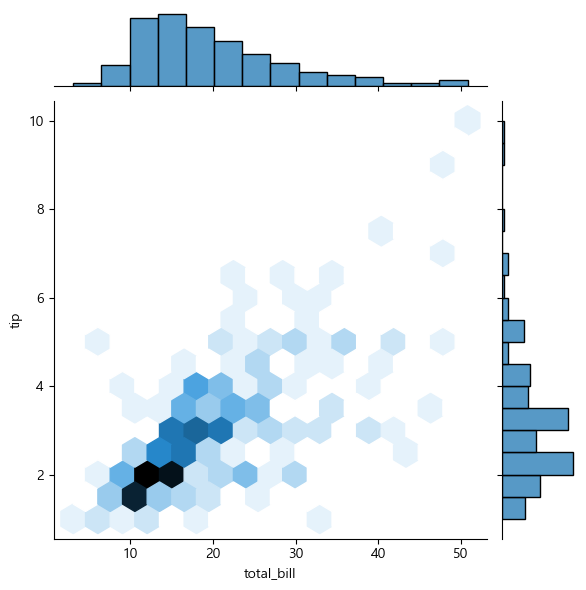

In [129]:
tips = sns.load_dataset('tips')
sns.jointplot(x = 'total_bill', y='tip', data= tips, kind = 'hex')

(432693, 3)


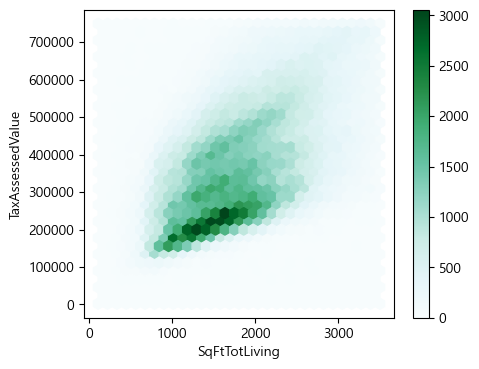

In [135]:
kc_tax = pd.read_csv('./data/kc_tax.csv.gz')
kc_tax0 = kc_tax.loc[(kc_tax['TaxAssessedValue'] < 750000) & 
                    (kc_tax['SqFtTotLiving'] > 100) &
                    (kc_tax['SqFtTotLiving'] < 3500)]

print(kc_tax0.shape)
ax = kc_tax0.plot.hexbin(x = 'SqFtTotLiving', y ='TaxAssessedValue', gridsize = 30, sharex = False, figsize = ( 5,4))

plt.show()

In [136]:
sns.kdeplot(data = kc_tax0, x = 'SqFtTotLiving', y = 'TaxAssessedValue', ax = ax)
plt.show()